# Machine Learning

In this file, instructions how to approach the challenge can be found.

# Models

Regression Problem: The goal is to predict delay of flights.

In [2]:
import pandas as pd

In [3]:
flights = pd.read_csv('data/flights_10000.csv', index_col=0)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,SAT,...,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,ORD,...,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,LAW,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,SAV,...,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,DTW,...,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [5]:
#convert date to datetime
import datetime as dt

In [6]:
flights['fl_date'] = pd.to_datetime(flights['fl_date'])

In [7]:
flights.dtypes

fl_date                datetime64[ns]
mkt_unique_carrier             object
branded_code_share             object
mkt_carrier                    object
mkt_carrier_fl_num              int64
op_unique_carrier              object
tail_num                       object
op_carrier_fl_num               int64
origin_airport_id               int64
origin                         object
origin_city_name               object
dest_airport_id                 int64
dest                           object
dest_city_name                 object
crs_dep_time                    int64
dep_time                      float64
dep_delay                     float64
taxi_out                      float64
wheels_off                    float64
wheels_on                     float64
taxi_in                       float64
crs_arr_time                    int64
arr_time                      float64
arr_delay                     float64
cancelled                     float64
cancellation_code              object
diverted    

In [8]:
flights_M0 = flights.select_dtypes(exclude=['object'])

In [9]:
#remove categorical int cols
flights_M0.drop(['mkt_carrier_fl_num', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id', 'dep_time', 'dep_delay', 'taxi_out', 
    'wheels_off', 'wheels_on', 'taxi_in', 'arr_time', 'cancelled',
    'diverted', 'actual_elapsed_time', 'air_time',
    'first_dep_time', 'total_add_gtime',
    'longest_add_gtime', 'no_name'], axis = 1, inplace = True)

In [10]:
flights_M0.head()

,fl_date,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-07-10,705,915,-2.0,130.0,1.0,822.0,NaN,NaN,NaN,NaN,NaN
1,2019-10-10,800,1148,-9.0,168.0,1.0,1005.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-18,1034,1130,8.0,56.0,1.0,140.0,NaN,NaN,NaN,NaN,NaN
3,2018-11-25,2200,2327,NaN,147.0,1.0,773.0,NaN,NaN,NaN,NaN,NaN
4,2018-10-24,841,1039,28.0,298.0,1.0,1960.0,0.0,0.0,28.0,0.0,0.0


In [11]:
flights_M0.fillna(0, inplace = True)

In [12]:
#split date into three cols
import datetime as dt
flights_M0['year'] = flights_M0['fl_date'].dt.year

In [13]:
flights_M0['month'] = flights_M0['fl_date'].dt.month
flights_M0['day'] = flights_M0['fl_date'].dt.day

In [14]:
flights_M0.drop(['fl_date'],axis = 1, inplace = True)

In [15]:
flights_M0.head()

,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day
0,705,915,-2.0,130.0,1.0,822.0,0.0,0.0,0.0,0.0,0.0,2018,7,10
1,800,1148,-9.0,168.0,1.0,1005.0,0.0,0.0,0.0,0.0,0.0,2019,10,10
2,1034,1130,8.0,56.0,1.0,140.0,0.0,0.0,0.0,0.0,0.0,2019,7,18
3,2200,2327,0.0,147.0,1.0,773.0,0.0,0.0,0.0,0.0,0.0,2018,11,25
4,841,1039,28.0,298.0,1.0,1960.0,0.0,0.0,28.0,0.0,0.0,2018,10,24


<AxesSubplot:>

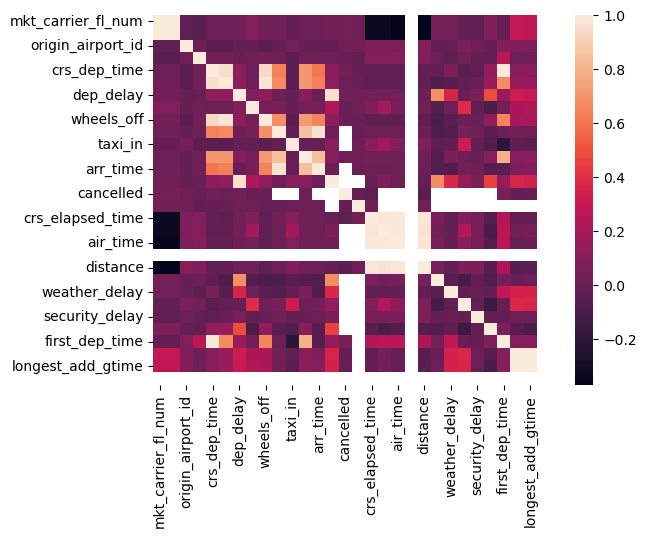

In [16]:
import seaborn as sns
sns.heatmap(flights.corr())

<AxesSubplot:>

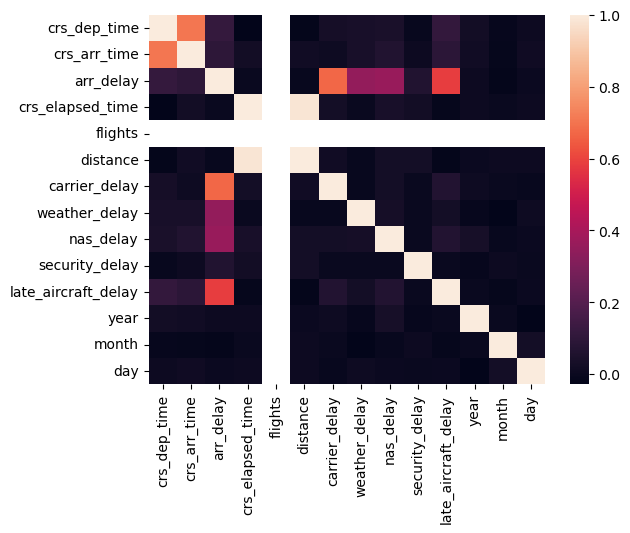

In [17]:
sns.heatmap(flights_M0.corr())

## Main Task: Regression Problem
The target variable is ARR_DELAY. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.

For example, variables CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights 1 week in advance.

In [18]:
#------Scalers---------
from sklearn.preprocessing import StandardScaler

#------Model Selection Tools------
from sklearn.model_selection import train_test_split


#------LINEAR MODELS---------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor

#------SUPPORT VECTOR MACHINES------
from sklearn.svm import SVR

#------ENSEMBLE MODELS-------
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor


#------METRICS--------
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
import warnings
warnings.filterwarnings('ignore')

## Model 0
Random Forest, SVR, Linear Regression

In [20]:
flights_M0.columns

Index(['crs_dep_time', 'crs_arr_time', 'arr_delay', 'crs_elapsed_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'year', 'month', 'day'],
      dtype='object')

In [21]:
#Declare feature vector and target variable
X = flights_M0.drop(['arr_delay','carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'], axis = 1)
y = flights_M0['arr_delay']

In [22]:
X.columns

Index(['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'flights',
       'distance', 'year', 'month', 'day'],
      dtype='object')

In [23]:
#maybe add stacked of these three?

# from sklearn.ensemble import StackingRegressor
# stacked = ??
# stacked.fit(X_train, y_train)    
# stacked_prediction = stacked.predict(X_test)

In [24]:
def regression(X, y, regressor_list):
    """
    produce regression and result for a list of regressors
    X = data
    y = target series
    regressor_list = list by regressor module    
    """
    #split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    #scale
    scalar = StandardScaler()
    X_scaled = scalar.fit_transform(X_train)       #fit has a memory, don't use on test
    X_scaled_test = scalar.transform(X_test)           #scalar is an instance that has the memory
    
    #model
    for reg in regressor_list:
        model = reg()                                        # instantiate the regressor
        model.fit(X_scaled, y_train)                            # fit the model
        y_pred = model.predict(X_scaled_test)                   # Predict the Test set results
        MSE = mean_squared_error(y_test, y_pred)
        R2 = r2_score(y_test, y_pred)
        print(f'Regressor: {str(reg)} \n MSE = {MSE} \n R2 = {R2} \n ----------------------------')

In [25]:
regressor_list = [LinearRegression, SVR, RandomForestRegressor, GradientBoostingRegressor, SGDRegressor, ElasticNetCV,]

In [26]:
regression(X, y, regressor_list)

Regressor: <class 'sklearn.linear_model._base.LinearRegression'> 
 MSE = 2316.8916080171725 
 R2 = 0.013723712824350365 
 ----------------------------
Regressor: <class 'sklearn.svm._classes.SVR'> 
 MSE = 2427.318875708148 
 R2 = -0.033284008729967285 
 ----------------------------
Regressor: <class 'sklearn.ensemble._forest.RandomForestRegressor'> 
 MSE = 2579.72769355 
 R2 = -0.09816283278619298 
 ----------------------------
Regressor: <class 'sklearn.ensemble._gb.GradientBoostingRegressor'> 
 MSE = 2570.283437164344 
 R2 = -0.09414251259039785 
 ----------------------------
Regressor: <class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> 
 MSE = 2320.965403872621 
 R2 = 0.011989540954971512 
 ----------------------------
Regressor: <class 'sklearn.linear_model._coordinate_descent.ElasticNetCV'> 
 MSE = 2321.132317962706 
 R2 = 0.01191848738972201 
 ----------------------------


## Model 1
Incoporate these additional features: weather, date into datetime modules, categorical variables to numeric variables

In [27]:
#split into test train, then use k-fold cross-validation on train set, test

## Model 2
use variable selection on data from model 1

## Model 3
Grid Search (maybe randomized search, doesn't actually search all combos)

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt


def random_search(X, y, model, parameters):
    
    """
    Randomly apply parameters to models and return the parameters that returned the best results:
    
    X = dataframe or array
    y = target Series
    model = model variable (defined outside of function)
    parameters = parameters to search through (dictionary)
    
    """ 
    
    #Split data into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    #Scale the data
    scaler = StandardScaler()
    X_scaled_train = scaler.fit_transform(X_train)
    X_scaled_test = scaler.transform(X_test)   
    
    randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 5, n_iter = 10, n_jobs=-1)
    randm_src.fit(X_scaled_train, y_train)

    print(" Results from Random Search " )
    print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
    print("\n The best score across ALL searched params:\n", randm_src.best_score_)
    print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)


In [29]:
LR_model = LinearRegression()
LR_parameters = {}

In [30]:
random_search(X, y, LR_model, LR_parameters)

 Results from Random Search 

 The best estimator across ALL searched params:
 LinearRegression()

 The best score across ALL searched params:
 0.011655959989132603

 The best parameters across ALL searched params:
 {}


In [31]:
SGD_model = SGDRegressor()
SGD_parameters = {'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'penalty' : ['l2','l1','elasticnet'],
                  'alpha' : sp_randFloat(0.0001, 0.02),
                  'l1_ratio': sp_randFloat(0.01, 1),
                  'max_iter': sp_randInt(1000,100000),
                  'shuffle' : [True,False],
                  'epsilon' : sp_randFloat(0.1, 10),
                  'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'eta0' : sp_randFloat(0.01, 10),
                  'power_t' : sp_randFloat(0.1, 10),
                  'early_stopping' : [False, True],
                  'validation_fraction' : sp_randFloat(0.1,1),
                  'n_iter_no_change' : sp_randInt(1,10)
}

In [32]:
random_search(X, y, SGD_model, SGD_parameters)

 Results from Random Search 

 The best estimator across ALL searched params:
 SGDRegressor(alpha=0.0014357691672625928, epsilon=9.000854117684112,
             eta0=7.741380398005669, l1_ratio=0.9806157073921997,
             learning_rate='adaptive', max_iter=94448, n_iter_no_change=2,
             power_t=7.018984411436759, validation_fraction=0.8179734684286812)

 The best score across ALL searched params:
 0.012420971595930762

 The best parameters across ALL searched params:
 {'alpha': 0.0014357691672625928, 'early_stopping': False, 'epsilon': 9.000854117684112, 'eta0': 7.741380398005669, 'l1_ratio': 0.9806157073921997, 'learning_rate': 'adaptive', 'loss': 'squared_error', 'max_iter': 94448, 'n_iter_no_change': 2, 'penalty': 'l2', 'power_t': 7.018984411436759, 'shuffle': True, 'validation_fraction': 0.8179734684286812}


We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

In [34]:
import pandas as pd

In [35]:
flights = pd.read_csv('data/flights_10000.csv', index_col=0)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,SAT,...,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,ORD,...,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,LAW,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,SAV,...,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,DTW,...,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN


In [36]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [37]:
#convert date to datetime
import datetime as dt

In [38]:
flights['fl_date'] = pd.to_datetime(flights['fl_date'])

In [39]:
flights.dtypes

fl_date                datetime64[ns]
mkt_unique_carrier             object
branded_code_share             object
mkt_carrier                    object
mkt_carrier_fl_num              int64
op_unique_carrier              object
tail_num                       object
op_carrier_fl_num               int64
origin_airport_id               int64
origin                         object
origin_city_name               object
dest_airport_id                 int64
dest                           object
dest_city_name                 object
crs_dep_time                    int64
dep_time                      float64
dep_delay                     float64
taxi_out                      float64
wheels_off                    float64
wheels_on                     float64
taxi_in                       float64
crs_arr_time                    int64
arr_time                      float64
arr_delay                     float64
cancelled                     float64
cancellation_code              object
diverted    

In [40]:
flights_M0 = flights.select_dtypes(exclude=['object'])

In [41]:
#remove categorical int cols
flights_M0.drop(['mkt_carrier_fl_num', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id', 'dep_time', 'dep_delay', 'taxi_out', 
    'wheels_off', 'wheels_on', 'taxi_in', 'arr_time', 'cancelled',
    'diverted', 'actual_elapsed_time', 'air_time',
    'first_dep_time', 'total_add_gtime',
    'longest_add_gtime', 'no_name'], axis = 1, inplace = True)

In [42]:
flights_M0.head()

,fl_date,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-07-10,705,915,-2.0,130.0,1.0,822.0,NaN,NaN,NaN,NaN,NaN
1,2019-10-10,800,1148,-9.0,168.0,1.0,1005.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-18,1034,1130,8.0,56.0,1.0,140.0,NaN,NaN,NaN,NaN,NaN
3,2018-11-25,2200,2327,NaN,147.0,1.0,773.0,NaN,NaN,NaN,NaN,NaN
4,2018-10-24,841,1039,28.0,298.0,1.0,1960.0,0.0,0.0,28.0,0.0,0.0


In [43]:
flights_M0.fillna(0, inplace = True)

In [44]:
#split date into three cols
import datetime as dt
flights_M0['year'] = flights_M0['fl_date'].dt.year

In [45]:
flights_M0['month'] = flights_M0['fl_date'].dt.month
flights_M0['day'] = flights_M0['fl_date'].dt.day

In [46]:
flights_M0.drop(['fl_date'],axis = 1, inplace = True)

In [47]:
flights_M0.head()

,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day
0,705,915,-2.0,130.0,1.0,822.0,0.0,0.0,0.0,0.0,0.0,2018,7,10
1,800,1148,-9.0,168.0,1.0,1005.0,0.0,0.0,0.0,0.0,0.0,2019,10,10
2,1034,1130,8.0,56.0,1.0,140.0,0.0,0.0,0.0,0.0,0.0,2019,7,18
3,2200,2327,0.0,147.0,1.0,773.0,0.0,0.0,0.0,0.0,0.0,2018,11,25
4,841,1039,28.0,298.0,1.0,1960.0,0.0,0.0,28.0,0.0,0.0,2018,10,24


<AxesSubplot:>

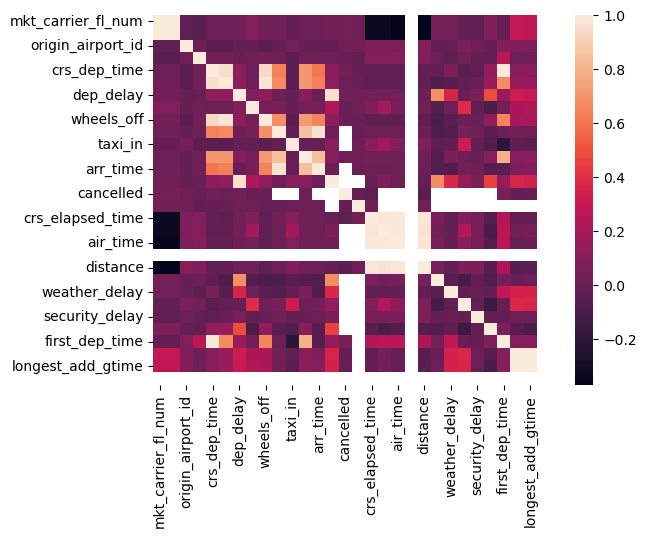

In [48]:
import seaborn as sns
sns.heatmap(flights.corr())

<AxesSubplot:>

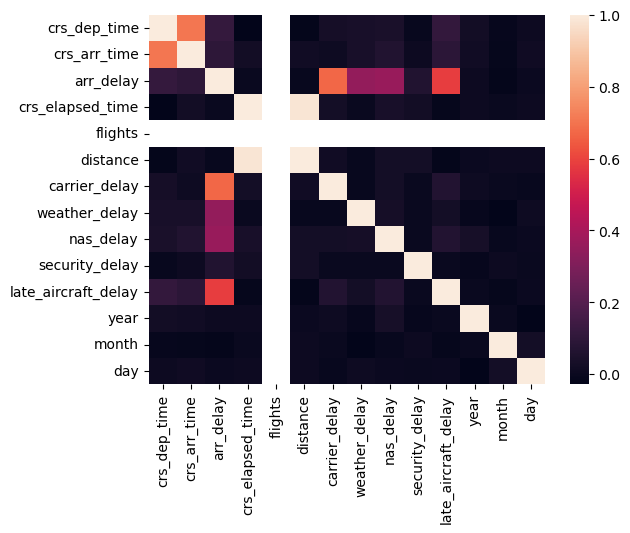

In [49]:
sns.heatmap(flights_M0.corr())

## Main Task: Regression Problem
The target variable is ARR_DELAY. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.

For example, variables CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights 1 week in advance.

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [51]:
import warnings
warnings.filterwarnings('ignore')

## Model 0
Random Forest, SVR, Linear Regression

In [52]:
flights_M0.columns

Index(['crs_dep_time', 'crs_arr_time', 'arr_delay', 'crs_elapsed_time',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'year', 'month', 'day'],
      dtype='object')

In [53]:
#Declare feature vector and target variable
X = flights_M0.drop(['arr_delay','carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'], axis = 1)
y = flights_M0['arr_delay']

In [54]:
X.columns

Index(['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'flights',
       'distance', 'year', 'month', 'day'],
      dtype='object')

In [55]:
#maybe add stacked of these three?

# from sklearn.ensemble import StackingRegressor
# stacked = ??
# stacked.fit(X_train, y_train)    
# stacked_prediction = stacked.predict(X_test)

In [56]:
def regression(X, y, regressor_list):
    """
    produce regression and result for a list of regressors
    X = data
    y = target series
    regressor_list = list by regressor module    
    """
    #split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    #scale
    scalar = StandardScaler()
    X_scaled = scalar.fit_transform(X_train)       #fit has a memory, don't use on test
    X_scaled_test = scalar.transform(X_test)           #scalar is an instance that has the memory
    
    #model
    for reg in regressor_list:
        model = reg()                                        # instantiate the regressor
        model.fit(X_scaled, y_train)                            # fit the model
        y_pred = model.predict(X_scaled_test)                   # Predict the Test set results
        MSE = mean_squared_error(y_test, y_pred)
        R2 = r2_score(y_test, y_pred)
        print(f'Regressor: {reg} \n MSE = {MSE} \n R2 = {R2} \n ----------------------------')

In [57]:
regressor_list = [LinearRegression, SVR, RandomForestRegressor]

In [58]:
regression(X, y, regressor_list)

Regressor: <class 'sklearn.linear_model._base.LinearRegression'> 
 MSE = 2316.8916080171725 
 R2 = 0.013723712824350365 
 ----------------------------
Regressor: <class 'sklearn.svm._classes.SVR'> 
 MSE = 2427.318875708148 
 R2 = -0.033284008729967285 
 ----------------------------
Regressor: <class 'sklearn.ensemble._forest.RandomForestRegressor'> 
 MSE = 2546.3752188999997 
 R2 = -0.08396503658714072 
 ----------------------------


## Model 1
Incoporate these additional features: weather, date into datetime modules, categorical variables to numeric variables

In [59]:
#split into test train, then use k-fold cross-validation on train set, test

## Model 2
use variable selection on data from model 1

## Model 3
Grid Search (maybe randomized search, doesn't actually search all combos)

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.